In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
data = pd.read_csv('apple_quality.csv')
data.drop('A_id', axis=1, inplace=True)
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [89]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [90]:
data['Acidity'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.2+ KB


In [74]:
data.shape

(4000, 8)

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Quality'] = le.fit_transform(data['Quality'])
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = data.drop('Quality', axis=1)
y = data['Quality']

data_scaled = scaler.fit_transform(x)
data_scaled = pd.DataFrame(data_scaled, columns=x.columns)
data_scaled.head()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 265.6+ KB


In [10]:
data.corr()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


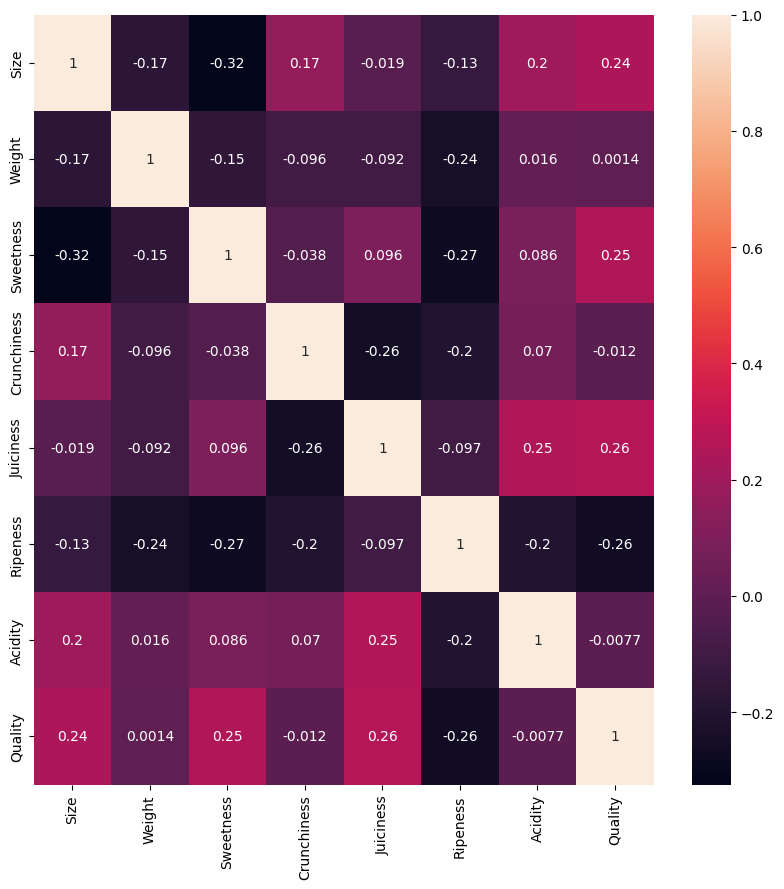

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
columns = data.columns
print("Column names in the dataset:")
for col in columns:
    print(col)


print("\nColumns as list:")
print(list(data.columns))

Column names in the dataset:
Size
Weight
Sweetness
Crunchiness
Juiciness
Ripeness
Acidity
Quality

Columns as list:
['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality']


In [93]:
data['Acidity'] = data['Acidity'].astype('float64')

In [80]:
print("Data types before conversion:")
print(data.dtypes)


numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_columns].drop('Quality', axis=1, errors='ignore')


X = X.fillna(X.mean())

import statsmodels.api as sm
y = data['Quality']
X = sm.add_constant(X)

X = X.astype(float)
y = y.astype(float)

model = sm.OLS(y, X).fit()
print("Regression Summary:")
print(model.summary())

Data types before conversion:
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality          int32
dtype: object
Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          2.78e-303
Time:                        16:23:49   Log-Likelihood:                -2190.3
No. Observations:                4000   AIC:                             4397.
Df Residuals:                    3992   BIC:                             4447.
Df Model:                           7                                         
Covariance Type:            nonrobust    

In [18]:
important_feature = ['Acidity', 'Ripeness', 'Juiciness', 'Sweetness', 'Weight', 'Size']


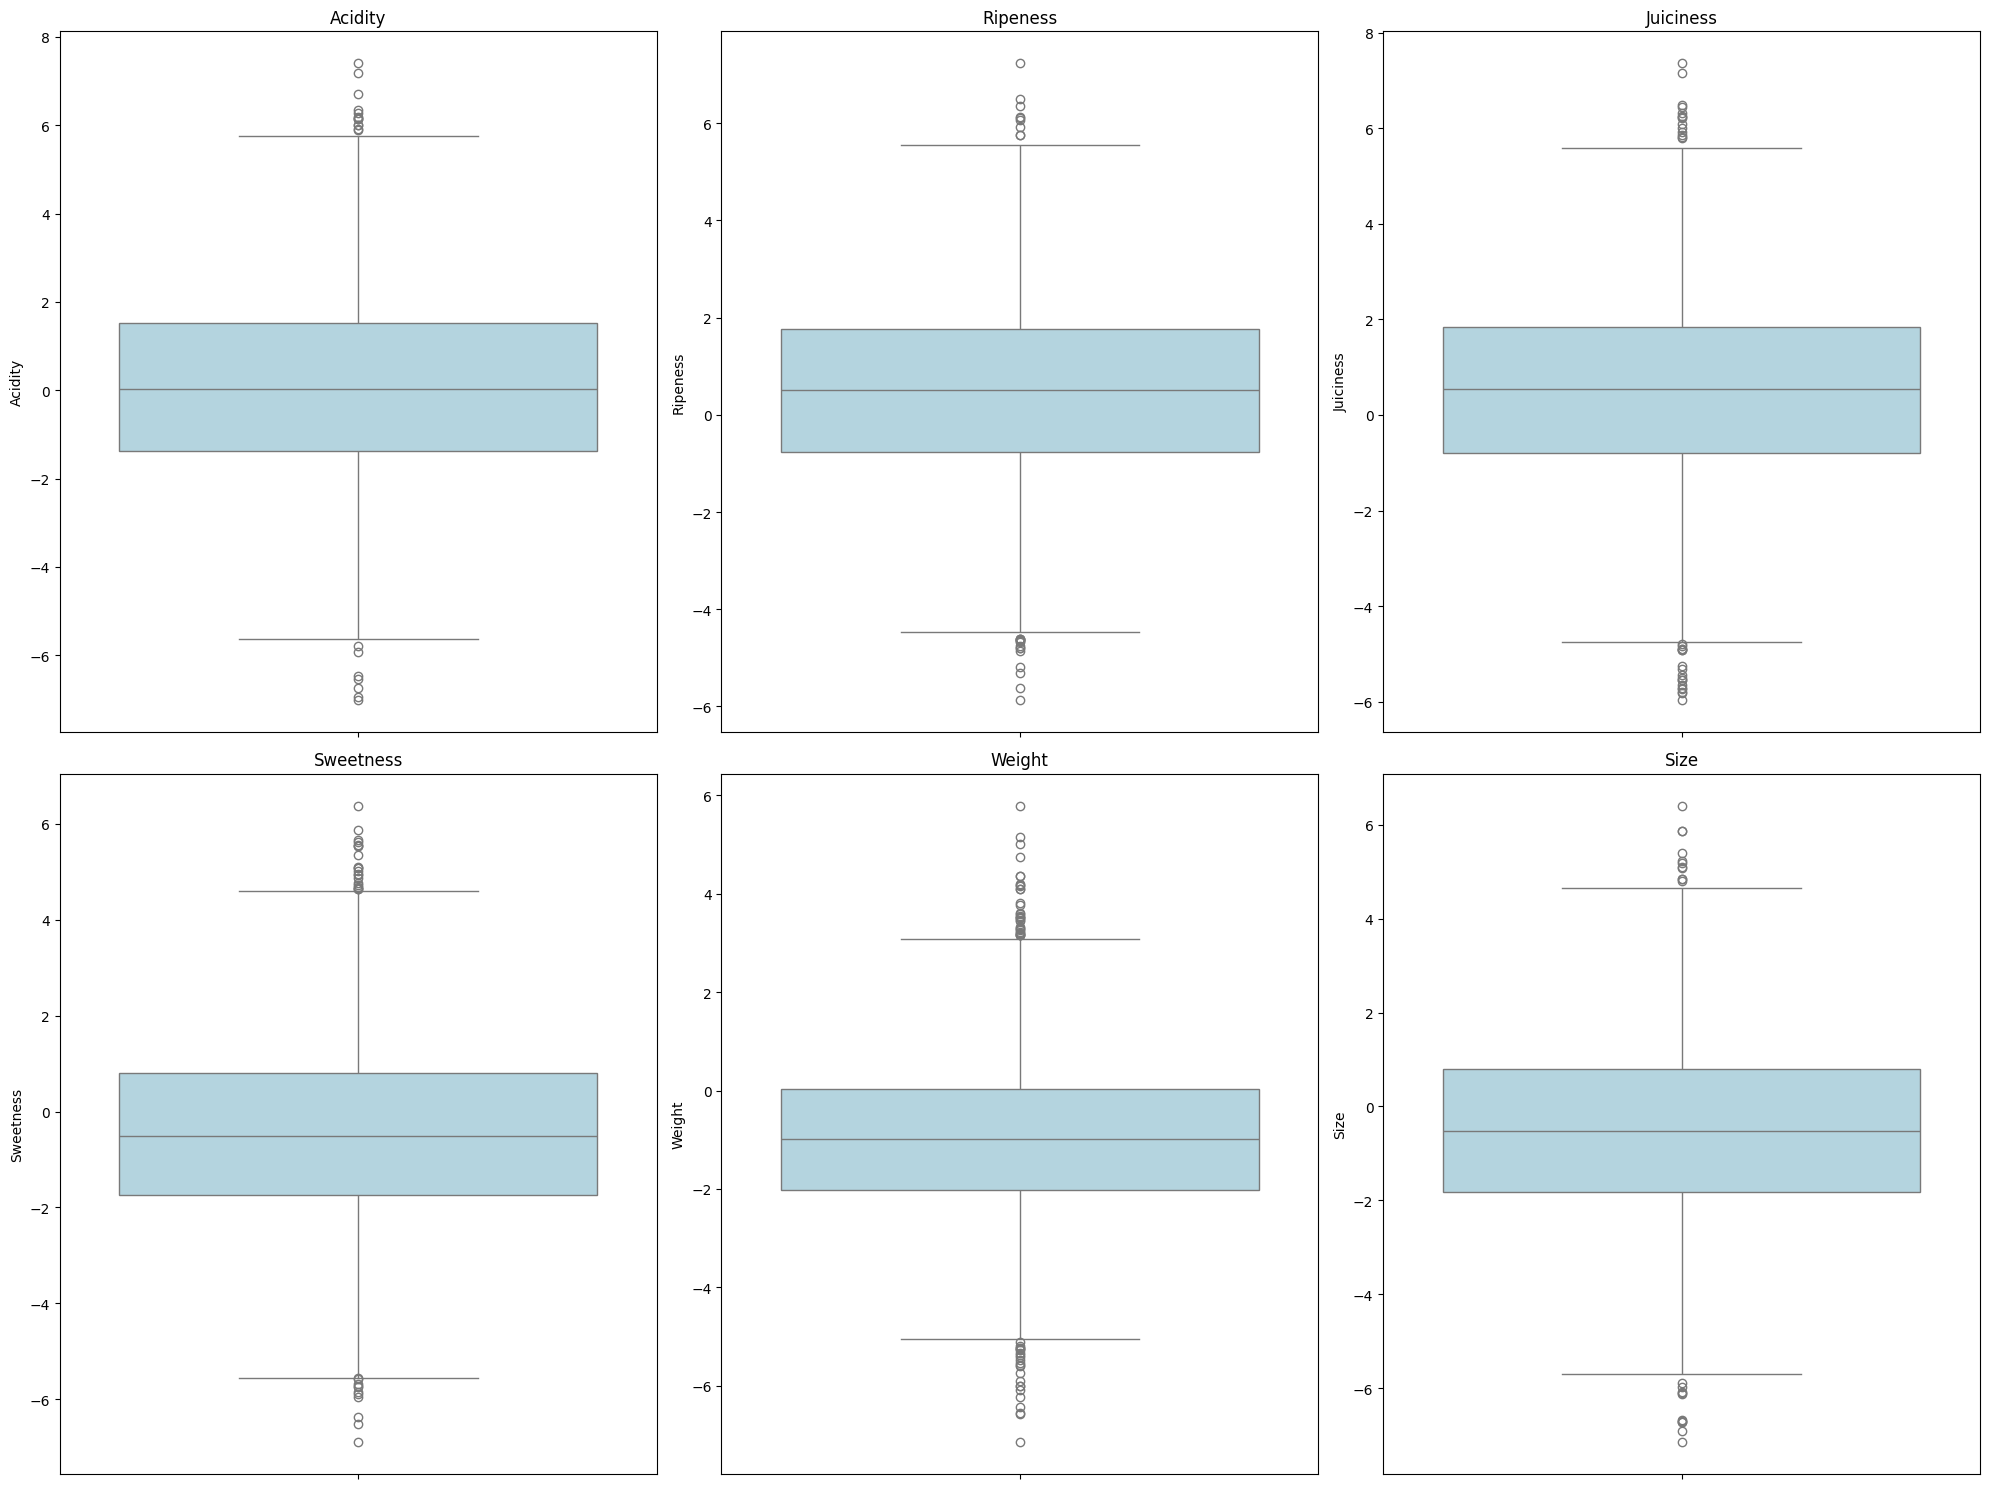

In [20]:
plt.subplots(2,3,figsize=(20, 15))
for i, col in enumerate(important_feature):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data[col], orient='v', color='lightblue')
    plt.title(col)
    plt.tight_layout()
    
plt.show()


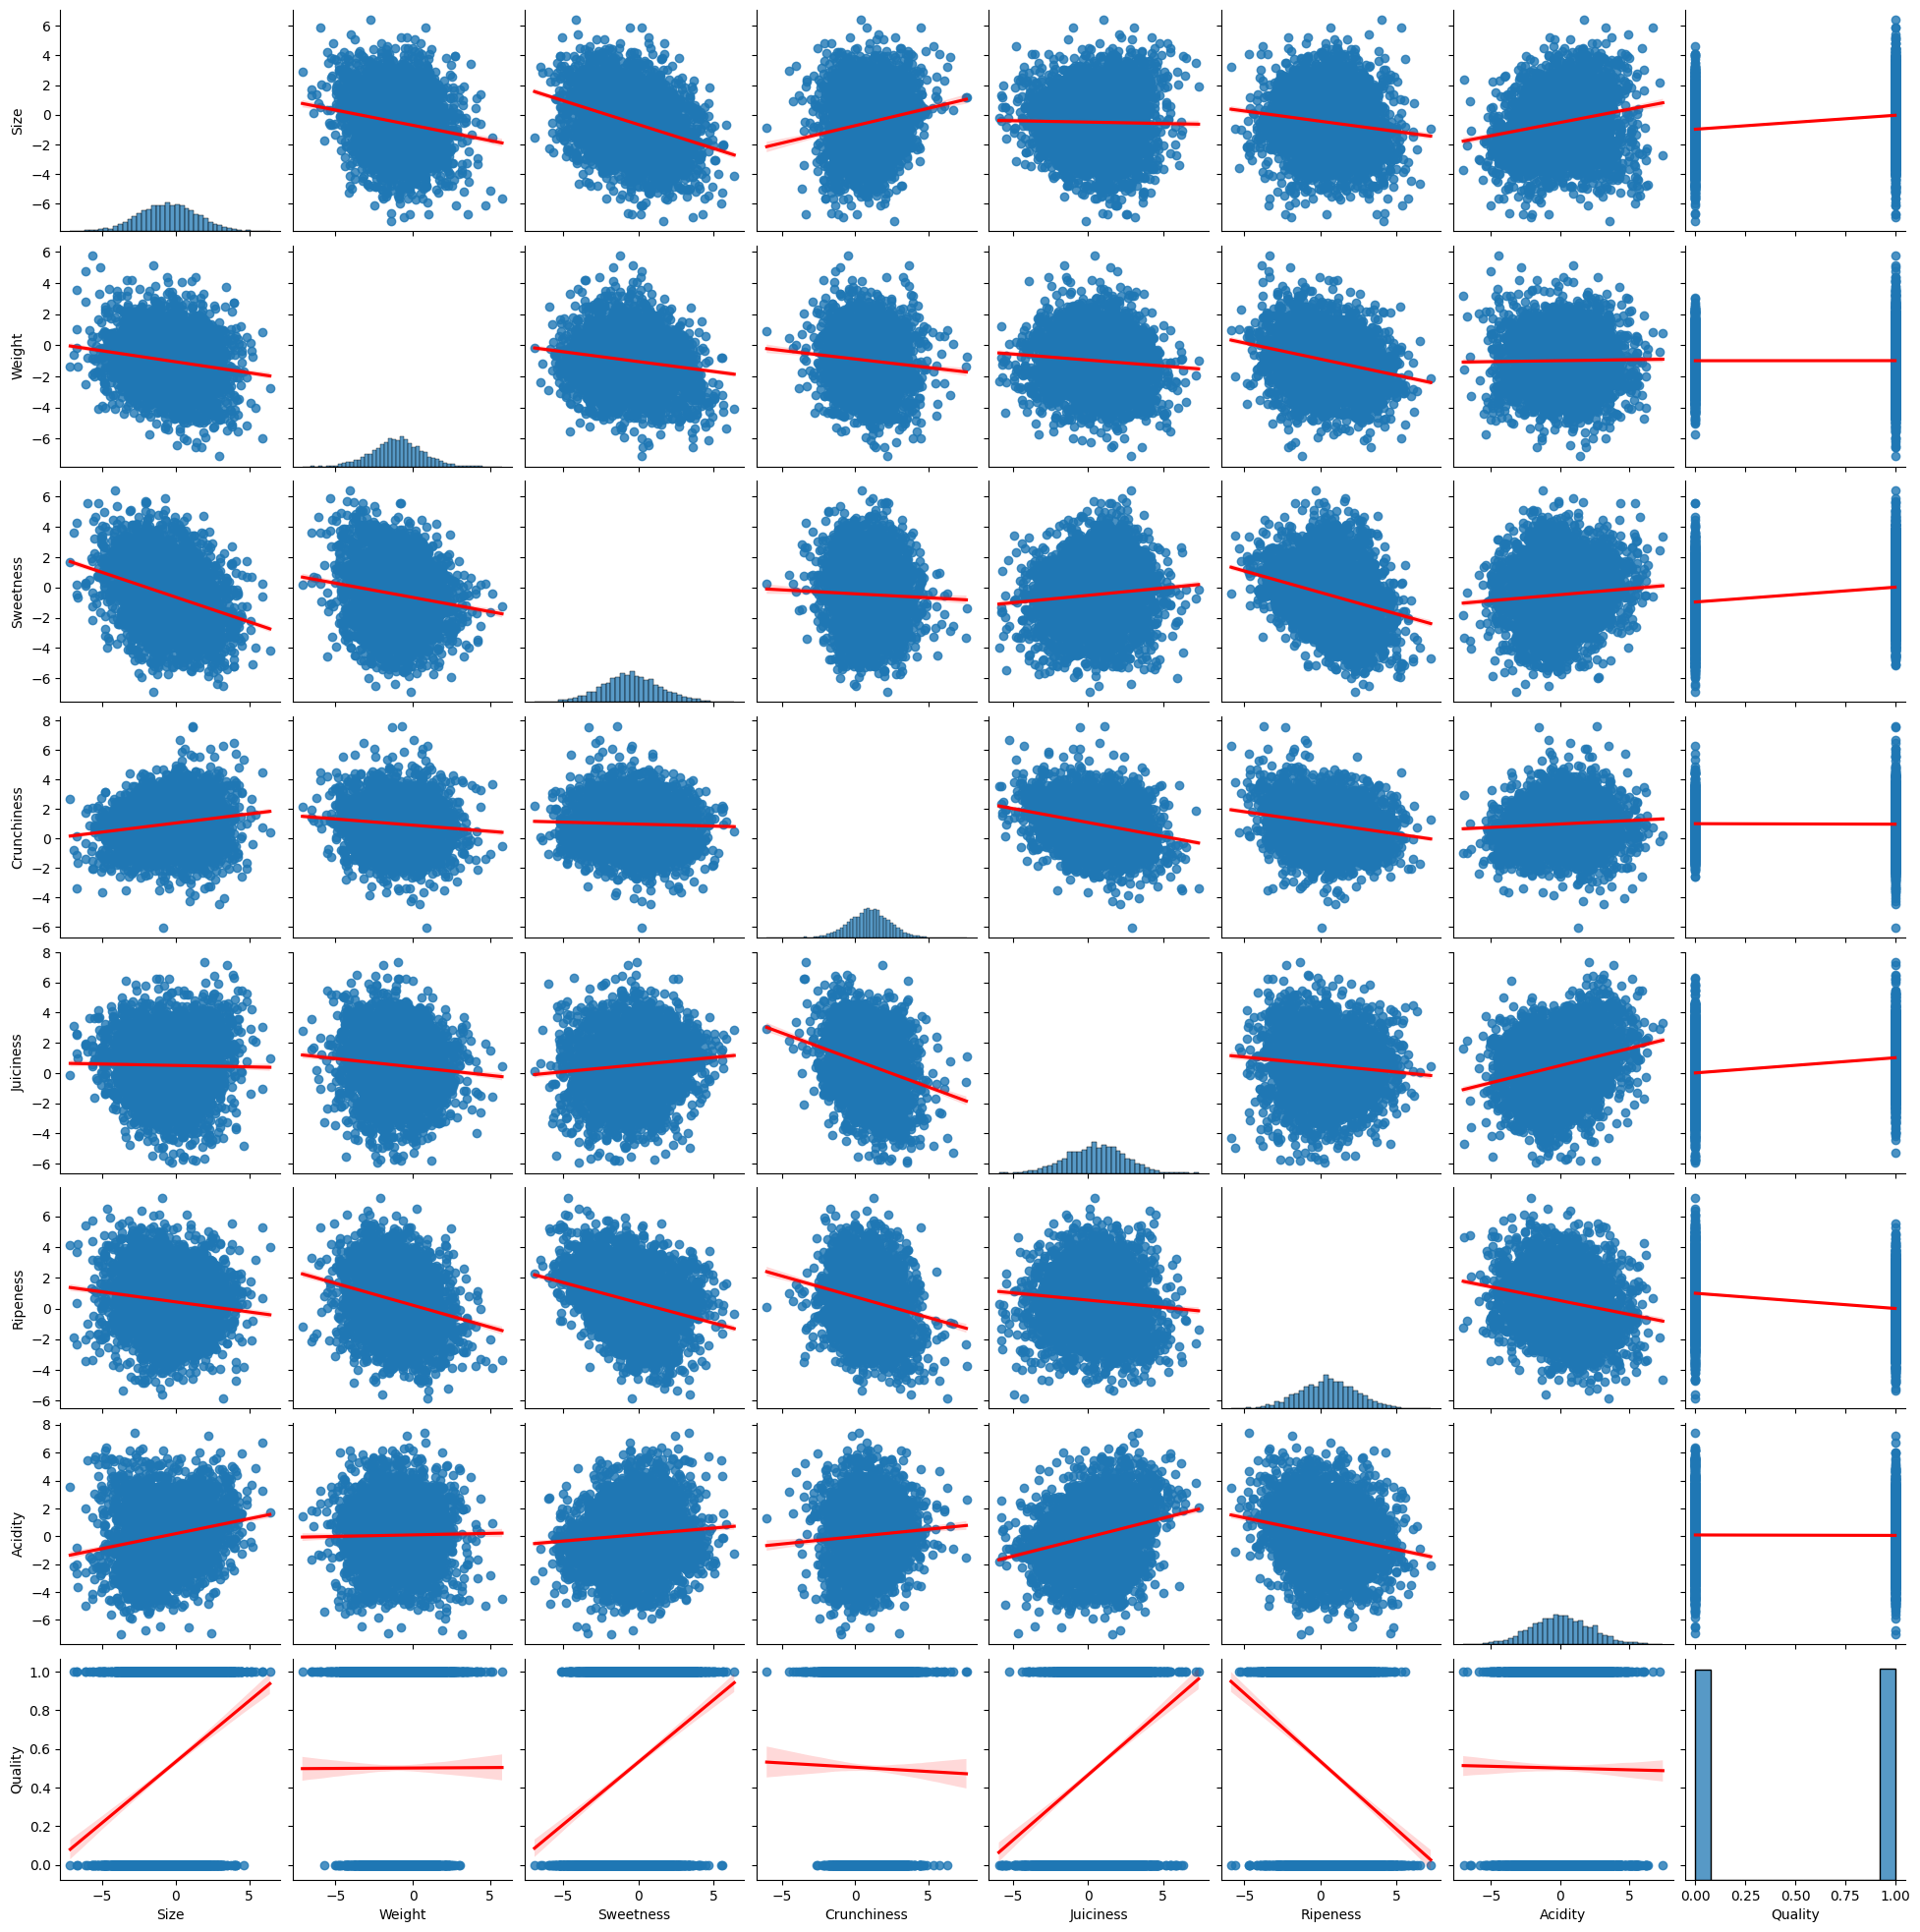

In [21]:
sns.pairplot(data, kind='reg', plot_kws={'line_kws': {'color': 'red'}})

<Figure size 2000x2000 with 0 Axes>

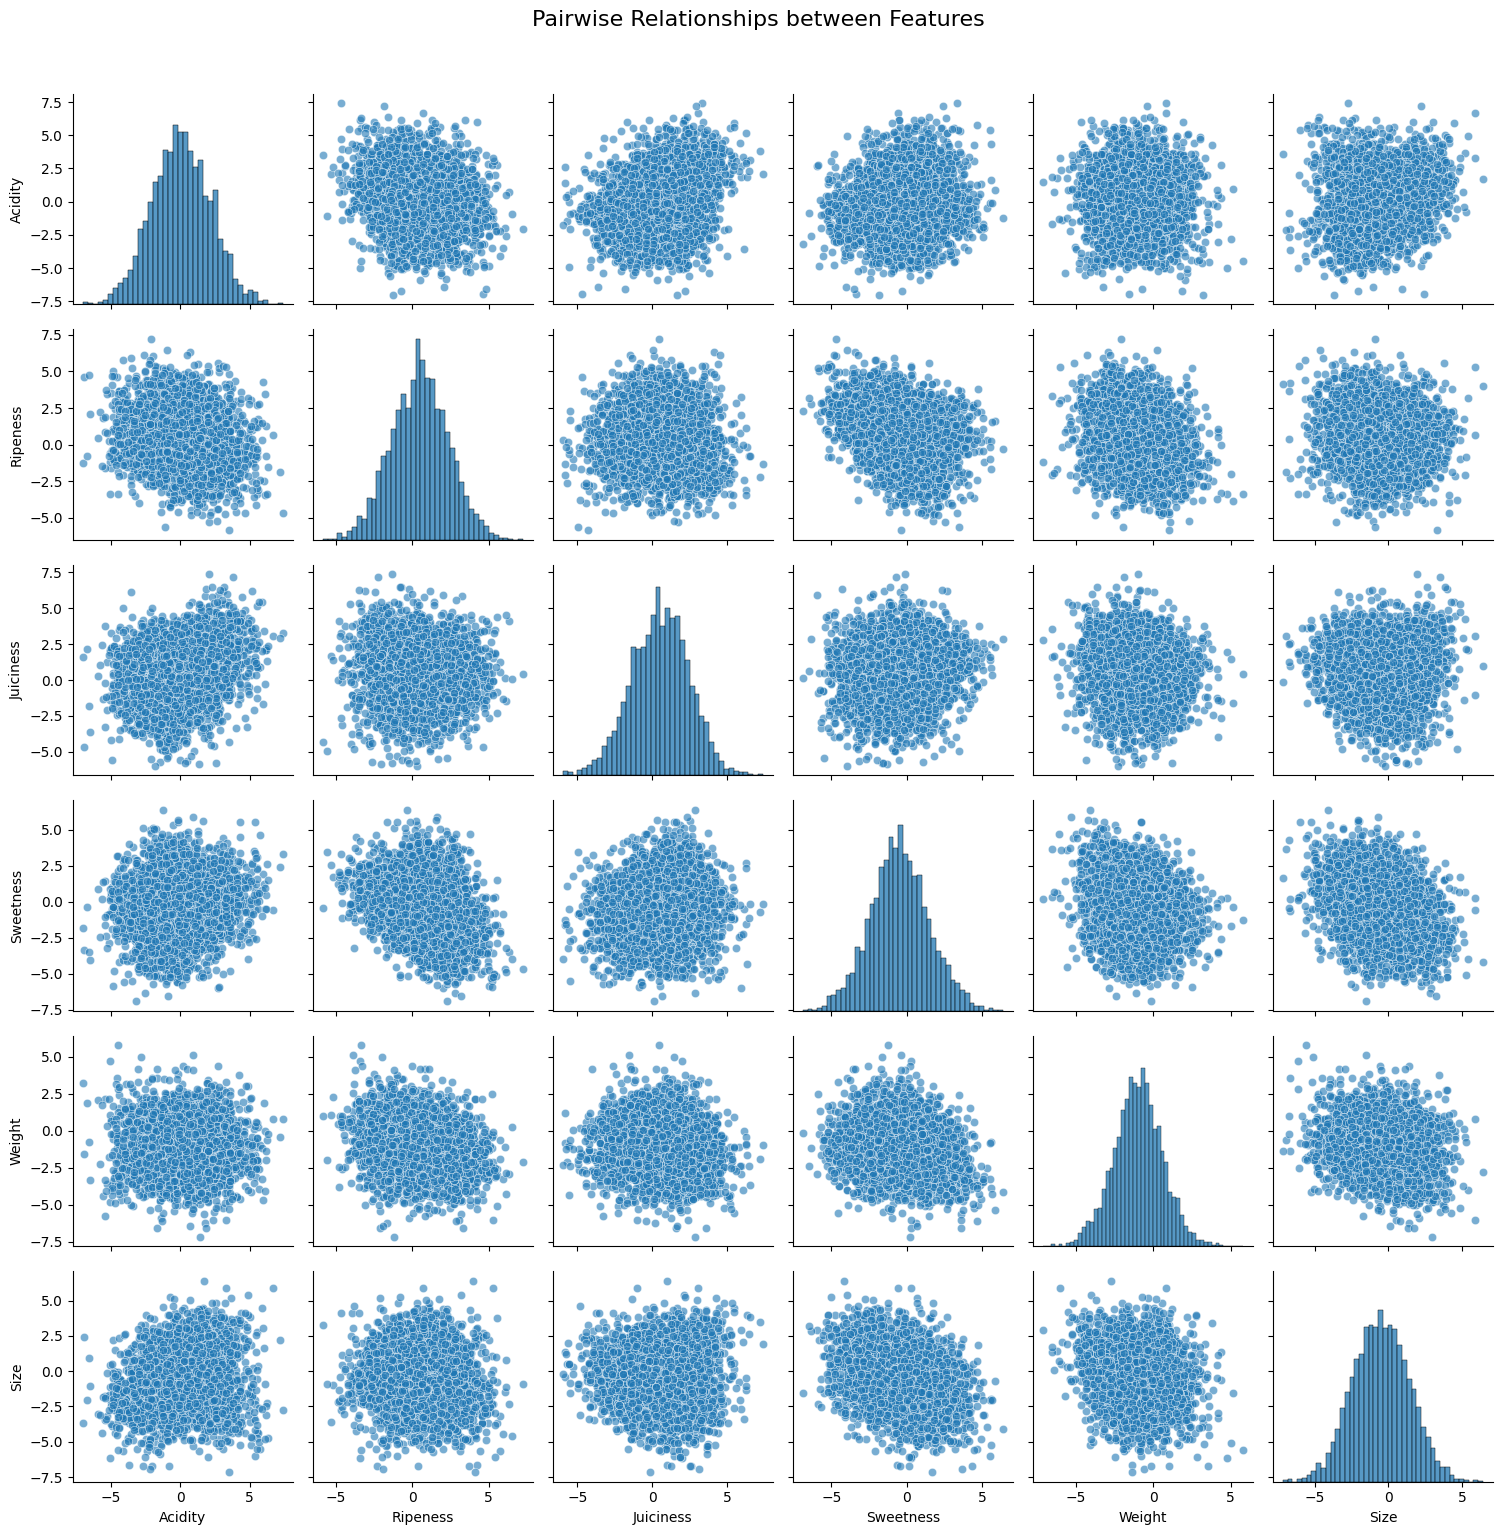

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 20))
pair_plot = sns.pairplot(data[important_feature], 
                        diag_kind='hist',
                        plot_kws={'alpha': 0.6},
                        height=2.5)


pair_plot.fig.suptitle('Pairwise Relationships between Features', 
                      y=1.02, 
                      fontsize=16)

plt.tight_layout()
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[important_feature]
y = data['Quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)



from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)





Mean Squared Error: 0.2475
R2 Score: 0.009993812461327578
Accuracy: 0.7525
Mean Squared Error: 0.11625
R2 Score: 0.5349970937318357
Accuracy: 0.88375


In [83]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
# Create models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Voting': VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())]),
    'Stacking': StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())])
}

models_accuracy = []
# Fit and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}")
    print("R2 Score:", r2_score(y_test, y_pred))
    accuracy = model.score(X_test, y_test)
    print("Accuracy:", accuracy)
    models_accuracy.append(accuracy)
    
    print(classification_report(y_test, y_pred))
    
# plt.figure(figsize=(10, 5))
# plt.bar(models.keys(), models_accuracy, color='lightblue')
# plt.xlabel('Models')
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy Comparison')
# plt.show()

    
    



Logistic Regression - Mean Squared Error: 0.2475
R2 Score: 0.009993812461327578
Accuracy: 0.7525
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

Random Forest - Mean Squared Error: 0.11125
R2 Score: 0.554997218732617
Accuracy: 0.88875
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       401
           1       0.89      0.88      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

Gradient Boosting - Mean Squared Error: 0.135
R2 Score: 0.4599966249789059
Accuracy: 0.865
              precision    recall  f1-score   support

           0 

c:\Users\Administrator\anaconda3\envs\aio2024_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Mean Squared Error: 0.2325
R2 Score: 0.06999418746367136
Accuracy: 0.7675
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       401
           1       0.77      0.76      0.76       399

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800

Bagging - Mean Squared Error: 0.145
R2 Score: 0.41999637497734343
Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       401
           1       0.87      0.83      0.85       399

    accuracy                           0.85       800
   macro avg       0.86      0.85      0.85       800
weighted avg       0.86      0.85      0.85       800

Extra Trees - Mean Squared Error: 0.12
R2 Score: 0.5199969999812497
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.89      0.87      0.

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import mean_squared_error, r2_score, classification_report

model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto']  
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, refit=True)


grid_search.fit(X_train, y_train)

grid_search.best_params_

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mean Squared Error: 0.07625
R2 Score: 0.6949980937380857
Accuracy: 0.92375
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       401
           1       0.92      0.93      0.92       399

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



In [35]:
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Estimator: SVC(C=1, gamma='auto')


In [96]:

model = LinearSVC()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'max_iter': [1000, 5000, 10000]  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


grid_search.best_params_


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)



c:\Users\Administrator\anaconda3\envs\aio2024_env\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrator\anaconda3\envs\aio2024_env\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrator\anaconda3\envs\aio2024_env\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrator\anaconda3\envs\aio2024_env\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to

Mean Squared Error: 0.24125
R2 Score: 0.0349939687123042
Accuracy: 0.75875
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       401
           1       0.76      0.76      0.76       399

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800

Best Parameters: {'C': 10, 'max_iter': 5000}
Best Estimator: LinearSVC(C=10, max_iter=5000)


c:\Users\Administrator\anaconda3\envs\aio2024_env\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [97]:

model = NuSVC()

param_grid = {
    'nu': [0.1, 0.3, 0.5, 0.7, 0.9], 
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)


grid_search.best_params_


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mean Squared Error: 0.07375
R2 Score: 0.7049981562384764
Accuracy: 0.92625
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       401
           1       0.92      0.93      0.93       399

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800

Best Parameters: {'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.3}


Logistic Regression Accuracy: 0.75375
Random Forest Accuracy: 0.89625
SVM Accuracy: 0.9075

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       401
           1       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



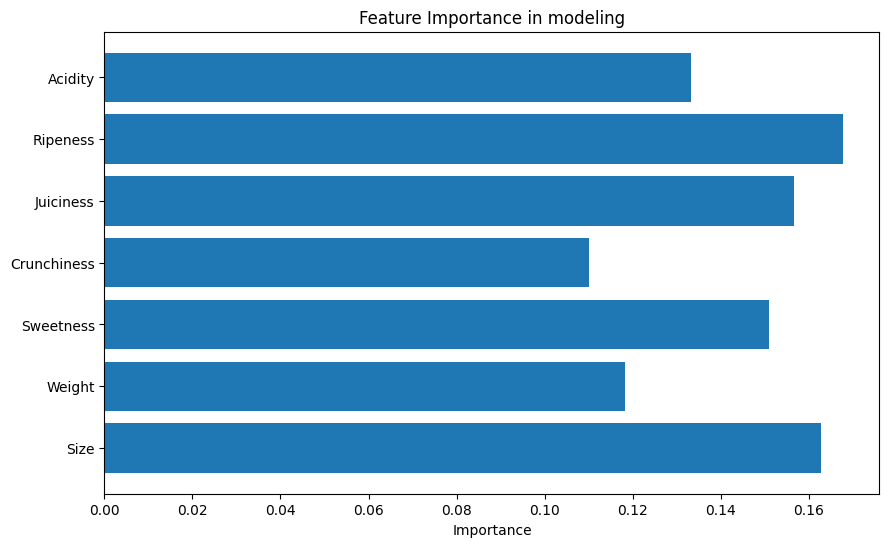

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


X = data.drop('Quality', axis=1)
y = data['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
rand_forest = RandomForestClassifier(random_state=42)
svc_model = SVC()

log_reg.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

log_reg_preds = log_reg.predict(X_test)
rand_forest_preds = rand_forest.predict(X_test)
svc_preds = svc_model.predict(X_test)

log_reg_acc = accuracy_score(y_test, log_reg_preds)
rand_forest_acc = accuracy_score(y_test, rand_forest_preds)
svc_acc = accuracy_score(y_test, svc_preds)

print("Logistic Regression Accuracy:", log_reg_acc)
print("Random Forest Accuracy:", rand_forest_acc)
print("SVM Accuracy:", svc_acc)

best_model_report = classification_report(y_test, rand_forest_preds)
print("\nClassification Report for Random Forest:\n", best_model_report)


feature_importance = rand_forest.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.title("Feature Importance in modeling")
plt.xlabel("Importance")
plt.show()

Logistic Regression Accuracy: 0.7525
Random Forest Accuracy: 0.8775
SVM Accuracy: 0.88875

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       401
           1       0.88      0.87      0.88       399

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



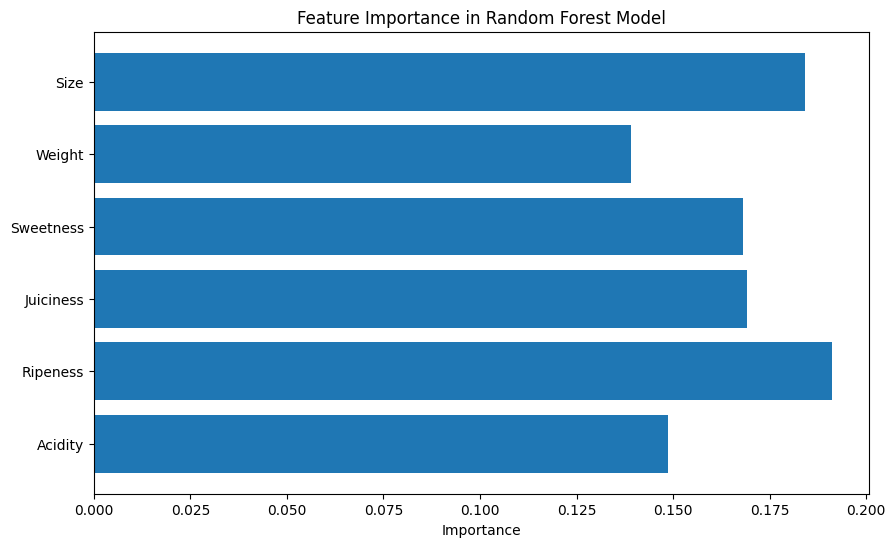

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = data[important_feature]
y = data['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
rand_forest = RandomForestClassifier(random_state=42)
svc_model = SVC()

log_reg.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

log_reg_preds = log_reg.predict(X_test)
rand_forest_preds = rand_forest.predict(X_test)
svc_preds = svc_model.predict(X_test)

log_reg_acc = accuracy_score(y_test, log_reg_preds)
rand_forest_acc = accuracy_score(y_test, rand_forest_preds)
svc_acc = accuracy_score(y_test, svc_preds)

print("Logistic Regression Accuracy:", log_reg_acc)
print("Random Forest Accuracy:", rand_forest_acc)
print("SVM Accuracy:", svc_acc)

best_model_report = classification_report(y_test, rand_forest_preds)
print("\nClassification Report for Random Forest:\n", best_model_report)

feature_importance = rand_forest.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.show()

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

file_path = 'apple_quality.csv'
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['Quality'] = label_encoder.fit_transform(data['Quality'])

X = data.drop(['A_id', 'Quality','Crunchiness'], axis=1)
y = data['Quality']
X = X.apply(pd.to_numeric, errors='coerce')
non_numeric_rows = X.isnull().any(axis=1)
X = X.drop(index=non_numeric_rows[non_numeric_rows].index)
y = y.drop(index=non_numeric_rows[non_numeric_rows].index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('log_reg', LogisticRegression(max_iter=1000)),
    ('svc', SVC(probability=True)),
    ('rand_forest', RandomForestClassifier(random_state=42)),
    ('ada_boost', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ('grad_boost', GradientBoostingClassifier())
]

stacking_clf = StackingClassifier(
    estimators=base_models, final_estimator=XGBClassifier()
)

adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
graboost_clf = GradientBoostingClassifier()
xgboost_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

stacking_clf.fit(X_train, y_train)
adaboost_clf.fit(X_train, y_train)
graboost_clf.fit(X_train, y_train)
xgboost_clf.fit(X_train, y_train)

stacking_preds = stacking_clf.predict(X_test)
adaboost_preds = adaboost_clf.predict(X_test)
graboost_preds = graboost_clf.predict(X_test)
xgboost_preds = xgboost_clf.predict(X_test)

stacking_acc = accuracy_score(y_test, stacking_preds)
adaboost_acc = accuracy_score(y_test, adaboost_preds)
graboost_acc = accuracy_score(y_test, graboost_preds)
xgboost_acc = accuracy_score(y_test, xgboost_preds)

print("Stacking Classifier Accuracy:", stacking_acc)
print("AdaBoost Classifier Accuracy:", adaboost_acc)
print("Gradient Boosting Classifier Accuracy:", graboost_acc)
print("XGBoost Classifier Accuracy:", xgboost_acc)





c:\Users\Administrator\anaconda3\envs\aio2024_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Administrator\anaconda3\envs\aio2024_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Administrator\anaconda3\envs\aio2024_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Administrator\anaconda3\envs\aio2024_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will 

Stacking Classifier Accuracy: 0.89625
AdaBoost Classifier Accuracy: 0.775
Gradient Boosting Classifier Accuracy: 0.87
XGBoost Classifier Accuracy: 0.90625


In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

file_path = 'apple_quality.csv'
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['Quality'] = label_encoder.fit_transform(data['Quality'])

X = data.drop(['A_id', 'Quality'], axis=1)
y = data['Quality']
X = X.apply(pd.to_numeric, errors='coerce')
non_numeric_rows = X.isnull().any(axis=1)
X = X.drop(index=non_numeric_rows[non_numeric_rows].index)
y = y.drop(index=non_numeric_rows[non_numeric_rows].index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

class AppleQualityDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_dataset = AppleQualityDataset(X_train, y_train)
test_dataset = AppleQualityDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


batch_size = 32 
input_features = 7

class AppleQualityModel(nn.Module):
    def __init__(self, input_size):
        super(AppleQualityModel, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 2)  # Assuming regression task
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x
    
input_size = 7 
model = AppleQualityModel(input_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), 
                      lr=0.001,  # learning rate
                      betas=(0.9, 0.999),  # momentum parameters (default)
                      eps=1e-08)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss}")
    
# Evaluate the model
model.eval()
correct = 0
total = 0
y_true = []
y_pred = []
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels)
        y_pred.extend(predicted)
        
print(f"Accuracy: {correct / total}")
print(f"Accuracy: {correct / total}")
print(classification_report(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2}")


Epoch 1, Loss: 56.51908904314041
Epoch 2, Loss: 38.169810593128204
Epoch 3, Loss: 32.66515530645847
Epoch 4, Loss: 29.813170231878757
Epoch 5, Loss: 28.198731936514378
Epoch 6, Loss: 26.93052799999714
Epoch 7, Loss: 25.996613830327988
Epoch 8, Loss: 25.358511544764042
Epoch 9, Loss: 24.50219538062811
Epoch 10, Loss: 23.812734737992287
Epoch 11, Loss: 23.093569356948137
Epoch 12, Loss: 22.52793062478304
Epoch 13, Loss: 22.116851203143597
Epoch 14, Loss: 21.489094637334347
Epoch 15, Loss: 21.064463034272194
Epoch 16, Loss: 20.6665972545743
Epoch 17, Loss: 20.371940553188324
Epoch 18, Loss: 19.70810793340206
Epoch 19, Loss: 19.497911363840103
Epoch 20, Loss: 19.19066011160612
Epoch 21, Loss: 18.561160925775766
Epoch 22, Loss: 18.26812930032611
Epoch 23, Loss: 17.963753659278154
Epoch 24, Loss: 17.835148848593235
Epoch 25, Loss: 17.046704340726137
Epoch 26, Loss: 16.708465851843357
Epoch 27, Loss: 16.463775280863047
Epoch 28, Loss: 16.126624772325158
Epoch 29, Loss: 15.785235185176134
Epoc

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

file_path = 'apple_quality.csv'
data = pd.read_csv(file_path)

label_encoder = LabelEncoder()
data['Quality'] = label_encoder.fit_transform(data['Quality'])

X = data.drop(['A_id', 'Quality'], axis=1)
y = data['Quality']
X = X.apply(pd.to_numeric, errors='coerce')
non_numeric_rows = X.isnull().any(axis=1)
X = X.drop(index=non_numeric_rows[non_numeric_rows].index)
y = y.drop(index=non_numeric_rows[non_numeric_rows].index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

class AppleQualityDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_dataset = AppleQualityDataset(X_train, y_train)
test_dataset = AppleQualityDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


batch_size = 32 
input_features = 7

class AppleQualityModel(nn.Module):
    def __init__(self, input_size):
        super(AppleQualityModel, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 2)  # Assuming regression task
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x
    
input_size = 7 
model = AppleQualityModel(input_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), 
                      lr=0.001,  # learning rate
                      betas=(0.9, 0.999),  # momentum parameters (default)
                      eps=1e-08)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss}")
    
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f"Accuracy: {correct / total}")



Epoch 1, Loss: 55.900398433208466
Epoch 2, Loss: 37.06687445938587
Epoch 3, Loss: 31.579975232481956
Epoch 4, Loss: 29.40778774023056
Epoch 5, Loss: 28.03808592259884
Epoch 6, Loss: 27.158198721706867
Epoch 7, Loss: 26.382916666567326
Epoch 8, Loss: 25.68993141502142
Epoch 9, Loss: 24.745745860040188
Epoch 10, Loss: 23.980981208384037
Epoch 11, Loss: 23.117869526147842
Epoch 12, Loss: 22.355331614613533
Epoch 13, Loss: 21.4820515550673
Epoch 14, Loss: 20.60246266052127
Epoch 15, Loss: 19.907595418393612
Epoch 16, Loss: 19.407761681824923
Epoch 17, Loss: 18.725025240331888
Epoch 18, Loss: 18.597340593114495
Epoch 19, Loss: 17.62011554837227
Epoch 20, Loss: 17.12598430365324
Epoch 21, Loss: 16.388160195201635
Epoch 22, Loss: 16.283681297674775
Epoch 23, Loss: 15.513539411127567
Epoch 24, Loss: 15.220943726599216
Epoch 25, Loss: 14.685955978929996
Epoch 26, Loss: 14.261897198855877
Epoch 27, Loss: 14.532109769061208
Epoch 28, Loss: 13.855576694011688
Epoch 29, Loss: 13.565907094627619
Epo

In [ ]:
import numpy as np
import torch

input = [-2.263264008, 1.163362206, -2.768287355, -0.809678004, -0.335848166, 3.420047987, 0.630023525]

input = np.array(input).reshape(1, -1)
input = scaler.transform(input)
input = torch.tensor(input, dtype=torch.float32) 

output = model(input)
_, predicted = torch.max(output.data, 1)
predicted = predicted.item()
predicted = label_encoder.inverse_transform([predicted])[0]

print(f"Predicted Quality: {predicted}")

Predicted Quality: bad


c:\Users\Administrator\anaconda3\envs\aio2024_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
